# Scraping dynamic webpages: 4 different techniques

I followed along with [this](https://kaparker.com/posts/data-science-skills-web-scraping-javascript-using-python) great tutorial by Kerry Parker and modified/updated the tutorial's code to run in jupyter notebook (04/20/2020), in addition to providing another alternative for scraping dynamic content that does work with Beautiful Soup, using the PyQt5 WebEngine.

To demonstrate the use or our webscrapers, we'll be scraping the webpage of an online supermarkt and are interested in getting information on their yoghurt products

In [6]:
# specify the url
urlpage = 'https://groceries.asda.com/search/yogurt' 
print(urlpage)

https://groceries.asda.com/search/yogurt


## 1. Scraping using Selenium with geckodriver

In [11]:
# import libraries
# use 'conda install ...' for any libraries that haven't been installed yet
import urllib.request
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd

Using 'inspect element' on the webpage we can access the html code behind the information that we want to extract. Here we are interested in getting the link to the productpage of each yoghurt

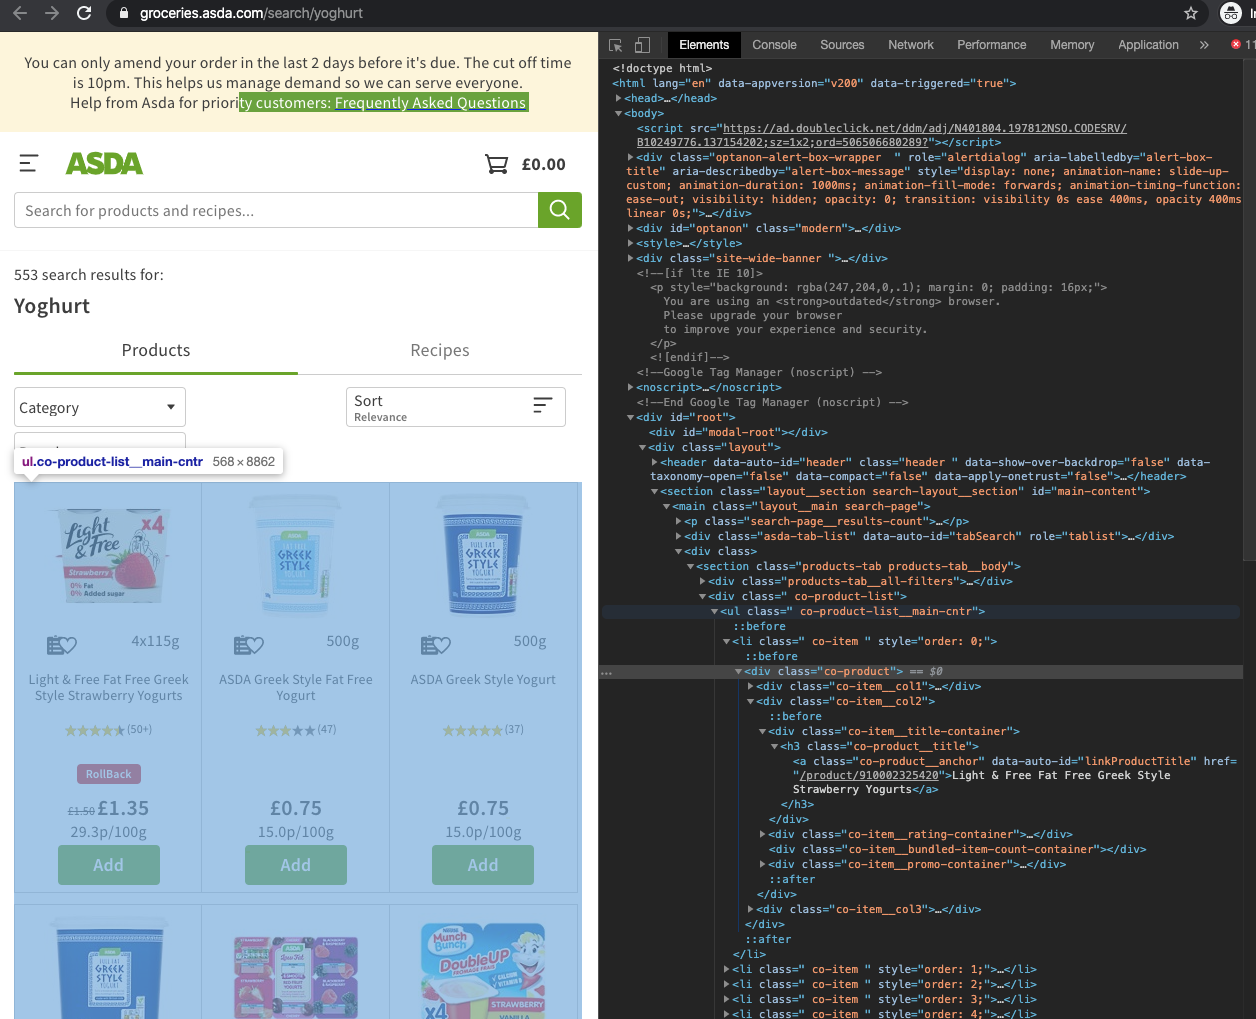

Here we will search for the elements of interest by xpath: based on the XML structure or the css selector.

In [12]:
# scrape the webpage using firefox webdriver
driver = webdriver.Firefox() #make sure the geckodriver folder is in the same dir 
#otherwise use: driver = webdriver.Firefox(executable_path = 'your/directory/of/choice')
# get web page
driver.get(urlpage)
# execute script to scroll down the page to make sure the page is fully loaded
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
# sleep for 30s to make sure the page is fully loaded
time.sleep(30)
# find elements by xpath
results = driver.find_elements_by_xpath("//*[@class=' co-product-list__main-cntr']//*[@class=' co-item ']//*[@class='co-product']//*[@class='co-item__title-container']//*[@class='co-product__title']")
print('Firefox Webdriver - Number of results', len(results))

Firefox Webdriver - Number of results 70


In [13]:
print(results)

[<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d613255c-c552-694d-8fe6-c9588dbf0e34", element="3a18bce2-1f09-2149-9ed7-0b47aa216b93")>, <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d613255c-c552-694d-8fe6-c9588dbf0e34", element="a901f91b-5dd5-c243-bbc9-93fd6ea7ba7c")>, <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d613255c-c552-694d-8fe6-c9588dbf0e34", element="bc064645-fd4f-1f41-85e7-33f05e22ee5a")>, <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d613255c-c552-694d-8fe6-c9588dbf0e34", element="23393bf5-4e78-0a41-8e1a-b8120221a1e7")>, <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d613255c-c552-694d-8fe6-c9588dbf0e34", element="deda5138-08f7-fe42-bef9-e428bd39a30a")>, <selenium.webdriver.firefox.webelement.FirefoxWebElement (session="d613255c-c552-694d-8fe6-c9588dbf0e34", element="044048da-5613-7a41-b434-d60b28d7fc11")>, <selenium.webdriver.firefox.webelement.FirefoxWebElement (sessi

Now we can loop over each result and save the data of interest: the product name and link.

In [14]:
# create empty array to store data
data = []
# loop over results
for result in results:
    product_name = result.text
    link = result.find_element_by_tag_name('a')
    product_link = link.get_attribute("href")
    # append dict to array
    data.append({"product" : product_name, "link" : product_link})
# close driver 
driver.quit()
# save to pandas dataframe
df = pd.DataFrame(data)
print(df)

                                              product  \
0                             Activia Rhubarb Yogurts   
1                             ASDA Greek Style Yogurt   
2                             ASDA Greek Style Yogurt   
3                    ASDA Greek Style Fat Free Yogurt   
4                    ASDA 6 Low Fat Red Fruit Yogurts   
..                                                ...   
65  Muller Corner Chocolate Digestive and Strawber...   
66        Activia Intensely Creamy Strawberry Yogurts   
67          Ski Smooth Strawberry & Raspberry Yogurts   
68              ASDA Chocolate Balls Split Pot Yogurt   
69  Muller Corner Strawberry, Peach & Apricot Yogurts   

                                                link  
0   https://groceries.asda.com/product/1000106846731  
1        https://groceries.asda.com/product/25611979  
2    https://groceries.asda.com/product/910000773349  
3    https://groceries.asda.com/product/910000461906  
4    https://groceries.asda.com/product/

In [ ]:
# Save data - write to csv
df.to_csv('asdaYogurtLink.csv')

As noted in the tutorial: Using Selenium with geckodriver is an easy way to scrape the web pages but loading the browser and waiting for the page to load takes time and sometimes the page might not load at all.

## 2. Scraping using Selenium with a headless browser

Here we're using a headless browser, which gives an improvement in time for the script to run since we aren’t opening a browser, but not all results are scraped in a similar way to using firefox webdriver in normal mode

In [15]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True
driver = webdriver.Firefox(firefox_options=options)
# or use: driver = webdriver.Firefox(firefox_options=options, executable_path = 'your/directory/of/choice')
# get web page
driver.get(urlpage)
# execute script to scroll down the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
# sleep for 30s
time.sleep(30)
# find elements by xpath
#results = driver.find_elements_by_xpath("//*[@id='componentsContainer']//*[contains(@id,'listingsContainer')]//*[@class='product active']//*[@class='title productTitle']")
results = driver.find_elements_by_xpath("//*[@class=' co-product-list__main-cntr']//*[@class=' co-item ']//*[@class='co-product']//*[@class='co-item__title-container']//*[@class='co-product__title']")
print('PhantomJS Webdriver - Number of results', len(results))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of firefox_options
  


PhantomJS Webdriver - Number of results 71


In [16]:
# create empty array to store data
data = []
# loop over results
for result in results:
    product_name = result.text
    link = result.find_element_by_tag_name('a')
    product_link = link.get_attribute("href")
    # append dict to array
    data.append({"product" : product_name, "link" : product_link})
# save to pandas dataframe
df = pd.DataFrame(data)
print(df)

                                              product  \
0   Light & Free Fat Free Greek Style Raspberry Yo...   
1                             ASDA Greek Style Yogurt   
2                             ASDA Greek Style Yogurt   
3                    ASDA Greek Style Fat Free Yogurt   
4                    ASDA 6 Low Fat Red Fruit Yogurts   
..                                                ...   
66  Muller Corner Chocolate Digestive and Strawber...   
67        Activia Intensely Creamy Strawberry Yogurts   
68          Ski Smooth Strawberry & Raspberry Yogurts   
69              ASDA Chocolate Balls Split Pot Yogurt   
70  Muller Corner Strawberry, Peach & Apricot Yogurts   

                                                link  
0    https://groceries.asda.com/product/910002325352  
1        https://groceries.asda.com/product/25611979  
2    https://groceries.asda.com/product/910000773349  
3    https://groceries.asda.com/product/910000461906  
4    https://groceries.asda.com/product/

In [17]:
# Save data - write to csv
df.to_csv('asdaYogurtLink2.csv')

## 3. Making an API request - JSON

The API request method is quick to implement and provides all the data we need from one request here. However, this method is not always an option! Many websites don't make their requests visible amd use additional security, in that case we cannot access the request URL that we need. In other cases the output data may require significant cleaning, which would be more work than using a web driver with some javascript to enable loading all results and looping over all pages. 

To use this method we need to inspect the 'Network' page XHR files as the page loads (you might need to refresh the page):

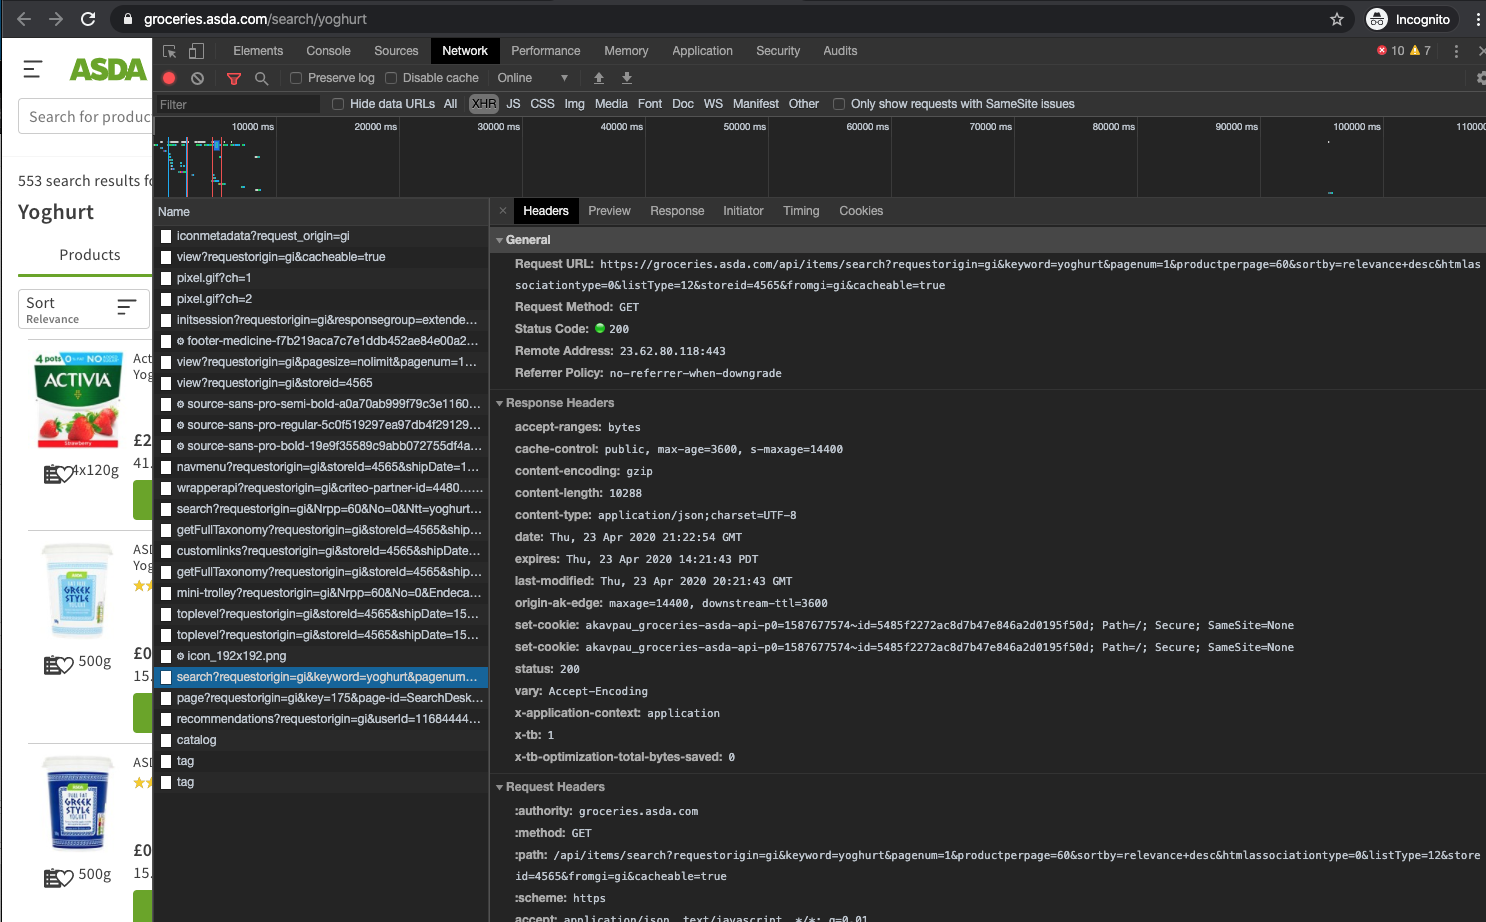

Within this list we see a /search request which calls an API endpoint to get the results that are presented on the page. If we inspect the search file and look at the headers we see the request url. As a test we can copy/paste this request URL into a browser and check if we get a JSON response. Since the parameters are also added in this request URL string we can  try to remove all but the keyword parameter to test whether any further parameters are required. In this case it was sufficient to only use the keyword to get the desired response so we can use 'https://groceries.asda.com/api/items/search?keyword=yogurt' as req URL.

After we will load and save the JSON response. This file can be saved and later on used to filter out our data of interest.

In [18]:
# get data making request to API
# import extra libraries
import json

In [19]:
# request url
urlreq = 'https://groceries.asda.com/api/items/search?keyword=yogurt'
# get response
response = urllib.request.urlopen(urlreq)
# load as json
jresponse = json.load(response)
# write to file as pretty print
with open('asdaresp.json', 'w') as outfile:
    json.dump(jresponse, outfile, sort_keys=True, indent=4)

## 4. Scraping using Beautiful Soup and PyQt5

What we would normally do to scape this webpage with Beautiful Soup:

In [24]:
# import libraries
import urllib.request
from bs4 import BeautifulSoup
# specify the url
urlpage = 'https://groceries.asda.com/search/yogurt' 
print(urlpage)
# query the website and return the html to the variable 'page'
page = urllib.request.urlopen(urlpage)
# parse the html using beautiful soup and store in variable 'soup'
soup = BeautifulSoup(page, 'html.parser')
# find product items
# at time of publication, Nov 2018:
# results = soup.find_all('div', attrs={'class': 'listing category_templates clearfix productListing'})
# updated Nov 2019:
results = soup.find_all('div', attrs={'class': 'co-product'})
print('Number of results', len(results))

https://groceries.asda.com/search/yogurt
Number of results 0


The easy way for webscraping with beautiful soup does not work for this website since javascript is being used on the page to load the content dynamically - but we can find a way around this using the PyQt5 WebEngine (Source code [here](https://www.youtube.com/watch?v=FSH77vnOGqU))

In [21]:
import sys
from PyQt5.QtWebEngineWidgets import QWebEnginePage
from PyQt5.QtWebEngineWidgets import QWebEngineView
from PyQt5.QtWidgets import QApplication
from PyQt5.QtCore import QUrl
import bs4 as bs
import urllib.request

In [22]:
class Page(QWebEnginePage):
    def __init__(self, url):
        self.app = QApplication(sys.argv) 
        QWebEnginePage.__init__(self)
        self.html = ''
        self.loadFinished.connect(self._on_load_finished)
        self.load(QUrl(url))
        self.app.exec_()

    def _on_load_finished(self):
        self.html = self.toHtml(self.Callable)
        print('Load finished')

    def Callable(self, html_str):
        self.html = html_str
        self.app.quit()



page = Page('https://groceries.asda.com/search/yoghurt')
soup = bs.BeautifulSoup(page.html, 'html.parser')
results2 = soup.find_all('div',attrs={'class': 'co-item__title-container'})
print(results2)

Load finished
[<div class="co-item__title-container"><h3 class="co-product__title"><a class="co-product__anchor" data-auto-id="linkProductTitle" href="/product/976012">Actimel Strawberry Yogurt Drinks</a></h3></div>, <div class="co-item__title-container"><h3 class="co-product__title"><a class="co-product__anchor" data-auto-id="linkProductTitle" href="/product/910000461906">ASDA Greek Style Fat Free Yogurt</a></h3></div>, <div class="co-item__title-container"><h3 class="co-product__title"><a class="co-product__anchor" data-auto-id="linkProductTitle" href="/product/25611979">ASDA Greek Style Yogurt</a></h3></div>, <div class="co-item__title-container"><h3 class="co-product__title"><a class="co-product__anchor" data-auto-id="linkProductTitle" href="/product/910000773349">ASDA Greek Style Yogurt</a></h3></div>, <div class="co-item__title-container"><h3 class="co-product__title"><a class="co-product__anchor" data-auto-id="linkProductTitle" href="/product/910002962908">ASDA 6 Low Fat Red Fru

In [27]:
print(results2[1])

<div class="co-item__title-container"><h3 class="co-product__title"><a class="co-product__anchor" data-auto-id="linkProductTitle" href="/product/910000461906">ASDA Greek Style Fat Free Yogurt</a></h3></div>


In [29]:
yoghurts = []
yoghurts.append(['productname','productpage'])

for result in results2:
    prname = result.find('a').getText()
    page1 = result.find('a').get('href')
    prpage ='https://groceries.asda.com/'+page1
    yoghurts.append([prname, prpage])

print(yoghurts)

[['productname', 'productpage'], ['Actimel Strawberry Yogurt Drinks', 'https://groceries.asda.com//product/976012'], ['ASDA Greek Style Fat Free Yogurt', 'https://groceries.asda.com//product/910000461906'], ['ASDA Greek Style Yogurt', 'https://groceries.asda.com//product/25611979'], ['ASDA Greek Style Yogurt', 'https://groceries.asda.com//product/910000773349'], ['ASDA 6 Low Fat Red Fruit Yogurts', 'https://groceries.asda.com//product/910002962908'], ['Munch Bunch Double Up Strawberry & Vanilla Yogurts', 'https://groceries.asda.com//product/910000446045'], ['Muller Corner Vanilla Chocolate Balls & Banana Chocolate Flakes Yogurt', 'https://groceries.asda.com//product/1000120228326'], ['Petits Filous Apricot, Strawberry & Raspberry Yogurt', 'https://groceries.asda.com//product/910001458433'], ['Wildlife Variety Yogurt Choobs', 'https://groceries.asda.com//product/1000078555663'], ['Muller Corner Vanilla Yogurt with Chocolate\xa0Balls', 'https://groceries.asda.com//product/1000120228362']

In [32]:
import csv
# Create csv and write rows to output file
with open('yoghurtsBS.csv','w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(yoghurts)